In [117]:
import sys
sys.path.append('../utils')
sys.path.append('../Datasets')
sys.path.append('../models')

AUD_DIR = '../../audioData/sythenticSoundscenes/train/'
CSV_DIR = '../Datasets/'

import audio_utils
import datasets
import os
import models
import torch
import pandas as pd
import numpy as np
import librosa
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim


In [17]:
csv_file = os.path.join(CSV_DIR, 'scrapper_train_dataset.csv')
scrapper_df = pd.read_csv(csv_file)

scrapper_dataset = datasets.scraperDataset(csv_file, AUD_DIR, only_scene=True)

In [120]:
random = torch.rand([1,40,1501])
models.logmelAE_30secs()(random).shape

torch.Size([1, 40, 1501])

In [114]:
random = torch.rand([1,40,1501])

encoder = nn.Sequential(
    nn.Conv2d(1, 25, kernel_size=3, stride=2, padding=1),
    nn.LeakyReLU(),

    nn.Conv2d(25, 50, kernel_size=3, stride=2, padding=1),
    nn.LeakyReLU(),

    nn.Conv2d(50, 5, kernel_size=3, stride=2, padding=1),
    nn.LeakyReLU(),

)

decoder = nn.Sequential(
    nn.ConvTranspose2d(5, 50, kernel_size=(3,2), stride=2, padding=0),
    nn.LeakyReLU(),

    nn.ConvTranspose2d(50, 25, kernel_size=(2,2), stride=2, padding=0),
    nn.LeakyReLU(),

    nn.ConvTranspose2d(25, 1, kernel_size=(2,3), stride=2, padding=2),
    nn.LeakyReLU(),

)

random.shape, decoder(encoder(random)).shape

(torch.Size([1, 40, 1501]), torch.Size([1, 40, 1501]))

In [55]:
import torchaudio
sam_file = os.path.join(AUD_DIR, scrapper_df['audio_fileNames'][0])

audio, sr = torchaudio.load(sam_file)
aud2 = audio_utils.load_audio(sam_file)
log_mel = audio_utils.get_log_melSpectrogram(aud2)

print(log_mel.shape)

kern = nn.Conv2d(1,5,3,2)
kern(log_mel).shape


torch.Size([1, 40, 1501])


torch.Size([5, 19, 750])

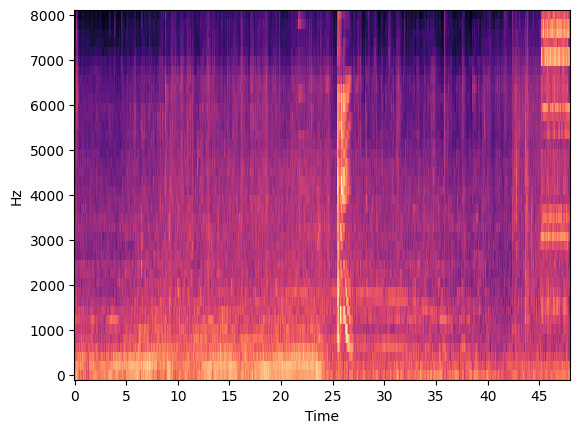

In [41]:
import librosa
import matplotlib.pyplot as plt

librosa.display.specshow(log_mel.squeeze().numpy(), x_axis="time", y_axis="linear", sr=16000)